<a href="https://colab.research.google.com/github/cyanmage/voxel51/blob/main/scratchpad_lenet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro to torch and autograd

In [ ]:
import torch
# height is an input feature
x = torch.tensor(183.0, requires_grad=False)
x

tensor(183.)

In [ ]:
# assume that this was randomly initialized
w = torch.tensor(0.78, requires_grad=True)
w

tensor(0.7800, requires_grad=True)

In [ ]:
# y_hat is a prediction
y_hat = w * x
y_hat

tensor(142.7400, grad_fn=<MulBackward0>)

In [ ]:
y = 40.0
# absolute error is a loss function, a measure for how bad our prediction is
absolute_error = torch.abs(y - y_hat)
absolute_error

tensor(102.7400, grad_fn=<AbsBackward0>)

In [ ]:
# We call .backward() on the loss value to compute gradient
absolute_error.backward()

In [ ]:
# Computing the gradient with backward() is the main task of PyTorch
w.grad

tensor(183.)

In [ ]:
# detach() removes the tracking of operations that we need to compute the gradients
absolute_error.detach()

tensor(102.7400)

## Use of prebuilt PyTorch datasets

In [ ]:
import torchvision

# This preset is something that is only available for a very limited set of data, prepublished on torchvision.datasets
raw_train_dataset = torchvision.datasets.MNIST("./data/", train=True, download=True)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.14MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.09MB/s]


In [ ]:
raw_train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [ ]:
raw_train_dataset.__getitem__(0)

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [ ]:
raw_train_dataset[0][0]

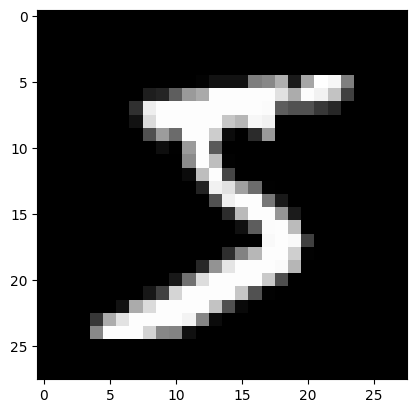

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(raw_train_dataset[0][0], cmap="gray");


In [ ]:
import numpy as np
np.array(raw_train_dataset[0][0])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
np.exp(np.array(raw_train_dataset[0][0]))

<ipython-input-14-8c680ee878fe>:1: RuntimeWarning: overflow encountered in exp
  np.exp(np.array(raw_train_dataset[0][0]))


array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
      

In [ ]:
np.exp(np.array(raw_train_dataset[0][0]) / 255.0)

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.    

## Create a dataset from a csv file

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/andandandand/practical-computer-vision/refs/heads/main/artifacts/first_five_mnist.csv", index_col="Unnamed: 0")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(df)

5

In [ ]:
# first row and first column of the dataframe, label
df.iloc[0, 0]

np.int64(1)

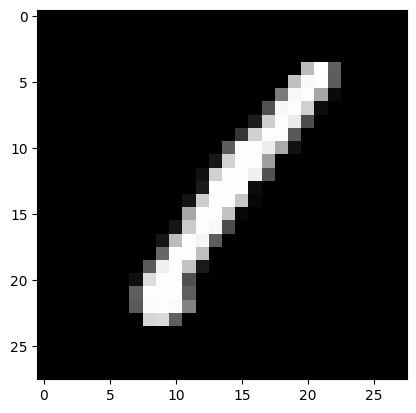

In [ ]:
# this is the image in uint8 values
plt.imshow(df.iloc[0, 1:].values.reshape(28, 28), cmap="gray");

In [ ]:
# this converts the input to numpy float32, for us to do computations with the weights inside the neural network
df.iloc[0, 1:].values.astype(np.float32);

In [ ]:
import torchvision.transforms.v2 as transforms

transform = transforms.Compose([transforms.ToImage(),
                                transforms.ToDtype(torch.float32, scale=True)])

train_transform = transforms.Compose([transforms.ToImage(),
                                      transforms.ToDtype(torch.float32, scale=True),
                                      transforms.RandomRotation(30)])

In [ ]:
transform(raw_train_dataset[0][0])

Image([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [ ]:
np_array = df.iloc[0, 1:].values.reshape(28, 28)
np_array.shape

(28, 28)

In [ ]:
transform(np_array).shape

torch.Size([1, 28, 28])

In [ ]:
transform(np_array)

Image([[[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.000

In [ ]:
1.3336e-17, 1.3336 * 10**-17

(1.3336e-17, 1.3336e-17)

In [ ]:
# Define the MNIST Dataset class, we need to define this in the Kaggle Digit Recognizer competition
# This is a tutorial example that demonstrates how to create a dataset from scratch in PyTorch

class MNISTDataset(torch.utils.data.Dataset):
  def __init__(self, dataframe, labels=True, transform=None):
    self.data = dataframe
    self.labels = labels
    self.transform = transform


  def __len__(self):
    """gives how many items we have inside the dataset"""
    return len(self.data)


  def __getitem__(self, idx):
    """gives a single item from the dataset, both the image and the label associated to it"""
    if self.labels:
      """this is the behavior for training data, where we have labels"""
      image = self.data.iloc[idx, 1:].values.astype(np.float32).reshape(28, 28)
      label = self.data.iloc[idx, 0]
    else:
      """this is the behavior for test data, where we don't have labels"""
      image = self.data.iloc[idx, :].values.astype(np.float32).reshape(28, 28)
      label = None

    if self.transform is not None:
      image = self.transform(image)


    # ensure that label tensors are detached
    label = torch.tensor(label).detach().long()

    return image, label


In [ ]:
sample_mnist_dataset = MNISTDataset(df,labels=True, transform=transform)
first_image, first_label = sample_mnist_dataset[0]
first_image.shape, first_label

(torch.Size([1, 28, 28]), tensor(1))

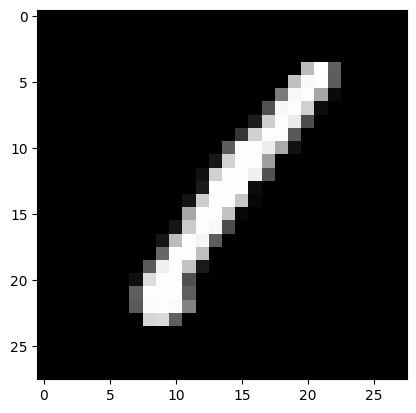

In [ ]:
plt.imshow(first_image.squeeze(), cmap="gray");

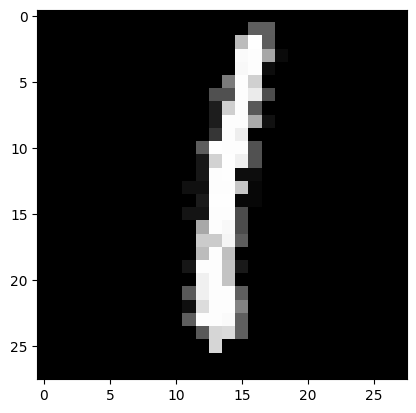

In [ ]:
plt.imshow(train_transform(first_image).squeeze(), cmap="gray");

## Sigmoid vs Softmax

These are the two possible output activation functions that we use to turn the scores that neural network produces (aka: "logits") into probabilities.

Softmax produces a single probability density function for all classes. Sigmoid produces independent probabilities.

In [ ]:
# cat, dog, horse
logits = torch.tensor([1.0, -2.0, 3.0])
import torch.nn.functional as F
# sigmoid for multilabel classifiers
F.sigmoid(logits)

tensor([0.7311, 0.1192, 0.9526])

In [ ]:
# softmax is appropriate for single label classifiers
F.softmax(logits, dim=0)

tensor([0.1185, 0.0059, 0.8756])

## Define a convolutional neural network with random weights

In [ ]:
import torch.nn as nn

conv_linear_embedder = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3),  # 26x26x32
    nn.ReLU(),
    nn.Conv2d(32, 64, kernel_size=3),  # 24x24x64
    nn.ReLU(),
    nn.Flatten(),  # 24*24*64
    nn.Linear(24*24*64, 10)
)


In [ ]:
first_layer_demo = nn.Conv2d(1, 32, kernel_size=5, padding=1)

In [ ]:
first_layer_demo.weight

Parameter containing:
tensor([[[[ 0.1225,  0.1332, -0.0853, -0.1114, -0.1130],
          [-0.1693,  0.0227,  0.1690,  0.1729,  0.1386],
          [-0.1556,  0.1003, -0.0254,  0.0976,  0.1452],
          [ 0.1560,  0.0913,  0.0908,  0.0236, -0.0723],
          [-0.0597,  0.1972,  0.0771, -0.1924,  0.1869]]],


        [[[-0.0689,  0.1651,  0.1255, -0.1218, -0.1343],
          [-0.1038,  0.1247,  0.0966,  0.1161,  0.0087],
          [ 0.0115,  0.1028, -0.0374,  0.1241, -0.1268],
          [ 0.1988,  0.0188, -0.0465,  0.1346, -0.1719],
          [ 0.1152,  0.0859, -0.0877,  0.1588,  0.0192]]],


        [[[ 0.1740, -0.1334,  0.1752, -0.0251, -0.0635],
          [-0.0150,  0.0466,  0.1634, -0.0609,  0.1642],
          [ 0.0148,  0.0986, -0.1019,  0.1417, -0.0718],
          [ 0.1041, -0.1768, -0.1995,  0.1815,  0.1415],
          [ 0.1341,  0.1552, -0.1214,  0.1209,  0.0162]]],


        [[[ 0.1905, -0.0489, -0.0709,  0.1372, -0.0532],
          [ 0.1636, -0.0158, -0.0798, -0.1545, -0.1508

In [ ]:
output_first_layer_demo = first_layer_demo(first_image)
output_first_layer_demo.shape

torch.Size([32, 26, 26])

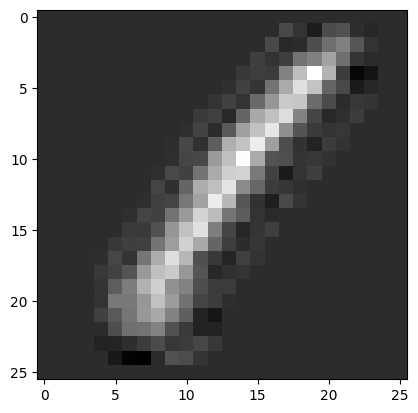

In [ ]:
plt.imshow(output_first_layer_demo[0, :, :].detach(), cmap="gray");

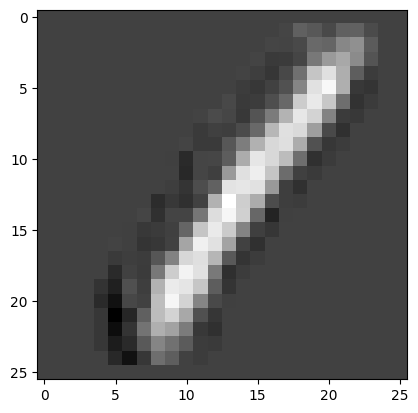

In [ ]:
plt.imshow(output_first_layer_demo[1, :, :].detach(), cmap="gray");

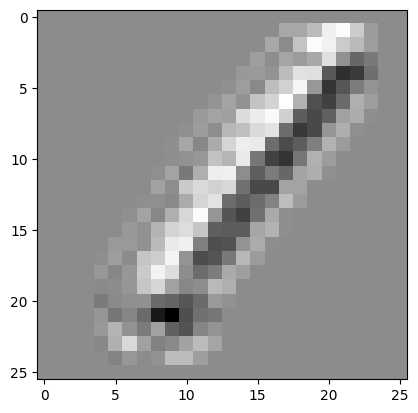

In [ ]:
# @title Visualize Convolution Output {run:"auto"}


slider_value = 19  # @param {type: "slider", min: 0, max: 31}
plt.imshow(output_first_layer_demo[slider_value, :, :].detach(), cmap="gray");

In [ ]:
conv_linear_embedder[0].weight.shape

torch.Size([32, 1, 3, 3])

In [ ]:
first_image.shape

torch.Size([1, 28, 28])

In [ ]:
# this gives me 10 logits, 10 scores for the different "confidences"
# for the 10 classes inside my dataset
logits = conv_linear_embedder(first_image.unsqueeze(0))
logits

tensor([[-8.7368, -4.4423, -1.8752,  3.6094,  6.5975, -3.2027,  1.7622, -0.6946,
         -1.4255, -3.1757]], grad_fn=<AddmmBackward0>)

In [ ]:
probs = F.softmax(logits, dim=1)
probs

tensor([[2.0663e-07, 1.5146e-05, 1.9732e-04, 4.7543e-02, 9.4369e-01, 5.2316e-05,
         7.4964e-03, 6.4251e-04, 3.0937e-04, 5.3750e-05]],
       grad_fn=<SoftmaxBackward0>)

In [ ]:
torch.argmax(probs, dim=1)

tensor([4])

## Understanding pooling

In [ ]:
max_pool = nn.MaxPool2d(2)
first_image.shape

torch.Size([1, 28, 28])

In [ ]:
max_pool(first_image).shape

torch.Size([1, 14, 14])

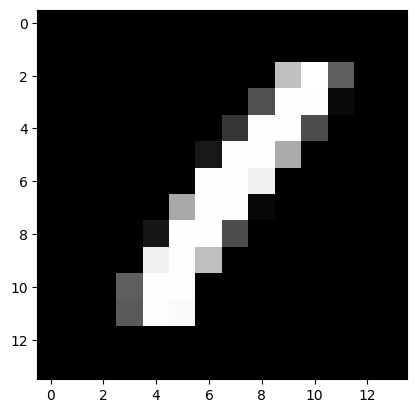

In [ ]:
plt.imshow(max_pool(first_image).squeeze(), cmap="gray");

In [ ]:
output_max_pool = max_pool(first_image)

In [ ]:
max_pool(output_first_layer_demo).shape

torch.Size([32, 13, 13])

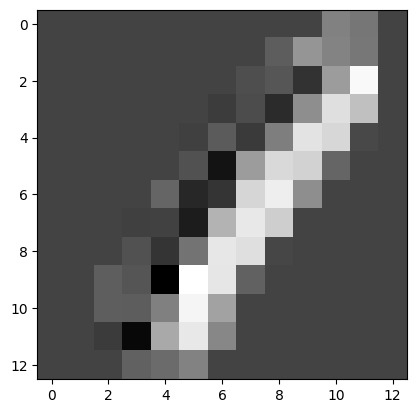

In [ ]:
# @title Visualize MaxPool Output {run:"auto"}


downsampling_by_max_pool = max_pool(output_first_layer_demo)


slider_value = 3  # @param {type: "slider", min: 0, max: 31}
plt.imshow(downsampling_by_max_pool[slider_value, :, :].detach(), cmap="gray");


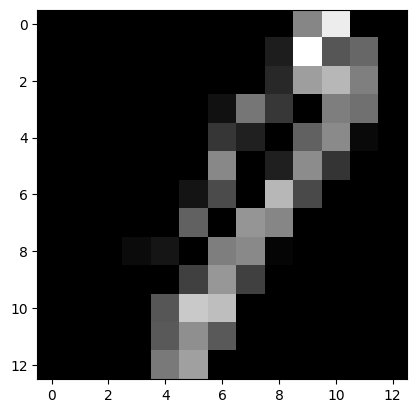

In [ ]:
# @title Visualize Relu after MaxPool Output {run:"auto"}


downsampling_by_max_pool = max_pool(output_first_layer_demo)


slider_value = 27  # @param {type: "slider", min: 0, max: 31}
plt.imshow(F.relu(downsampling_by_max_pool[slider_value, :, :].detach()), cmap="gray");


In [ ]:
dropout = nn.Dropout(0.5)
dropout(output_max_pool).shape

torch.Size([1, 14, 14])

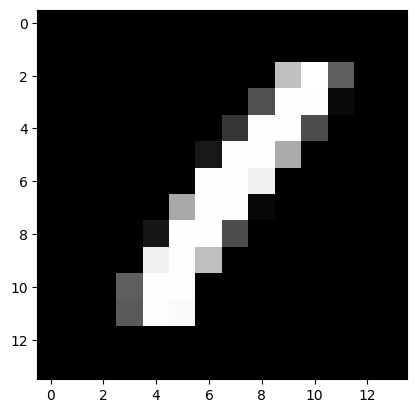

In [ ]:
dropout.eval()
plt.imshow(dropout(output_max_pool).squeeze(), cmap="gray");

## Create a LeNet5 using nn.Module syntax

In [ ]:
first_image.shape

torch.Size([1, 28, 28])

In [ ]:
class Lenet5(nn.Module):
  def __init__(self, num_classes=10):
    """These are the attributes of the network:
        Trainable layers, activation functions, flattening, DropOut, BatchNorm"""
    # this is something that we need to do to update parameters correctly
    super(Lenet5, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
    self.fc1 = nn.Linear(in_features=16*4*4, out_features=90)
    self.fc2 = nn.Linear(in_features=90, out_features=84)
    self.fc3 = nn.Linear(in_features=84, out_features=num_classes)
    pass

  def forward(self, x):
    """this defines the order of activations from input to output"""
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, kernel_size=2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, kernel_size=2)
    x = x.view(-1, 16*4*4)
    x = F.relu(self.fc1(x))
    return x

In [ ]:
lenet = Lenet5()
lenet(first_image)

tensor([[ 0.0000, 40.3271,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 15.8872,
          0.0000,  0.0000, 30.4223,  0.0000,  0.0000,  0.0000, 53.1159, 36.1342,
         11.0395,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000, 38.4108,  0.0000, 20.2463, 17.2890,
          0.0000,  0.0000,  9.1396, 30.5797, 59.6677,  9.2729, 20.9516, 54.6578,
         28.4659, 32.3774,  0.0000,  0.0000, 14.8646, 43.5077, 25.6026,  0.0000,
          0.0000, 14.0832,  0.0000, 13.8622,  0.0000,  0.0000, 12.0022, 10.7931,
          0.0000,  0.0000,  6.5720,  0.0000,  0.0000,  0.0000,  0.0000, 33.0048,
          0.0000,  0.0000, 28.6286,  0.0000, 21.1905,  1.6317, 26.7325,  0.0000,
          6.2706, 17.5633, 11.5119, 27.7958,  0.0000,  6.5782,  0.0000,  0.0000,
          0.0000,  0.0000,  8.4802, 21.8782,  2.3628, 75.3192,  0.0000, 17.5259,
          5.6590,  0.0000]], grad_fn=<ReluBackward0>)

In [ ]:
# We need to set up the device to move variables and models to the GPU
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
# we use the .to(device) syntax to move values to the GPU / CPU
lenet = lenet.to(device)

# this tells us where the weights of the model are
lenet.conv1.weight.device

device(type='cuda', index=0)